# 機械学習帳 確認問題(4.9)

[機械学習帳のモデル選択と正則化の確認問題(3.4)を解きます](https://chokkan.github.io/mlnote/regression/03regularization.html#id4)。

## 講義内容の復習

![chapter4-1.PNG](./images/chapter4/chapter4-1.PNG)

![chapter4-2.PNG](./images/chapter4/chapter4-2.PNG)

## 1. リッジ回帰モデルを学習する反復式の導出

リッジ回帰の反復式を導出します。まず、反復式の定義は次の通りでした。

$$
\pmb{w}^{(t+1)} = \pmb{w}^{(t)} - \eta \delta^{(t)}
$$

リッジ回帰における$\delta_{Ridge}^{(t)}$は、事例ごとの残差$\hat{l}_{\pmb{x}_i, y_i}(\pmb{w}^{(t)})$の勾配$\nabla\hat{l}_{\pmb{x}_i, y_i}(\pmb{w}^{(t)})$になります。事例ごとの残差$\hat{l}_{\pmb{x}_i, y_i}(\pmb{w}^{(t)})$は、リッジ回帰の定義より次の通り定義されます。各事例ごとの正則化項とするため、$\alpha$を事例数で割っています。

$$
\begin{aligned}
\hat{l}_{\pmb{x}_i, y_i}(\pmb{w}^{(t)})
    &= \|y_i - \hat{y}^{(t)}_i\|^2 + \frac{\alpha}{N} \|\pmb{w}^{(t)}\|^2 \\
    &= \|y_i - \pmb{x}_i^T\pmb{w}^{(t)}\|^2 + \frac{\alpha}{N} \|\pmb{w}^{(t)}\|^2 \\
\end{aligned}
$$

残差$\hat{l}_{\pmb{x}_i, y_i}(\pmb{w}^{(t)})$の勾配$\nabla\hat{l}_{\pmb{x}_i, y_i}(\pmb{w}^{(t)})$は次のように定義されます。

$$
\begin{aligned}
\nabla\hat{l}_{\pmb{x}_i, y_i}(\pmb{w}^{(t)})
    &= \frac{\partial \hat{l}_{\pmb{x}_i, y_i}(\pmb{w}^{(t)})}{\partial \pmb{w}^{(t)}} \\
    &= 2 (y_i - \pmb{x}_i^T\pmb{w}^{(t)}) \pmb{x}_i (-1) + 2 \frac{\alpha}{N} \pmb{w}^{(t)} \\
    &= 2 (\pmb{x}_i^T\pmb{w}^{(t)} - y_i) \pmb{x}_i + 2 \frac{\alpha}{N} \pmb{w}^{(t)} \\
    &= 2 (\hat{y}^{(t)}_i - y_i) \pmb{x}_i + 2 \frac{\alpha}{N} \pmb{w}^{(t)} \\
\end{aligned}
$$

$\delta_{Ridge}^{(t)} = \nabla\hat{l}_{\pmb{x}_i, y_i}(\pmb{w}^{(t)})$であることから、リッジ回帰の反復式は次のように定義されます。

$$
\begin{aligned}
\pmb{w}^{(t+1)} &= \pmb{w}^{(t)} - \eta \delta_{Ridge}^{(t)} \\
    &= \pmb{w}^{(t)} - 2\eta \left((\hat{y}^{(t)}_i - y_i) \pmb{x}_i + \frac{\alpha}{N} \pmb{w}^{(t)}\right)
\end{aligned}
$$

## 2. $L_2$正則化を反復式から解釈する

リッジ回帰の反復式から、$\frac{-2 \eta \alpha}{N}\pmb{w}^{(t)}$が$\pmb{w}^{(t)}$の更新から常にマイナスされることがわかります。これにより、$\pmb{w}^{(t)}$が大きくなりすぎるのを防いでいるといえます。

## (3) リッジ回帰の実装

確率的勾配降下法でリッジ回帰のパラメータを推定します。

In [1]:
import numpy as np


X = np.array([ 0.  ,  0.16,  0.22,  0.34,  0.44,  0.5 ,  0.67,  0.73,  0.9 ,  1.  ])
Y = np.array([-0.06,  0.94,  0.97,  0.85,  0.25,  0.09, -0.9 , -0.93, -0.53,  0.08])

リッジ回帰のクラスを作成します。

In [2]:
from sklearn.preprocessing import PolynomialFeatures


class RidgeRegression():
    
    def __init__(self, degree):
        self.degree = degree
        self.w = None
    
    def train(self, X, Y, eta=1.0, alpha=1e-6, epoch=40000, eps=1e-4):
        N = len(X)
        transformer = PolynomialFeatures(self.degree, include_bias=True)
        F = transformer.fit_transform(X.reshape((-1, 1)))
        self.w = np.zeros([F.shape[-1], 1])
        for t in range(epoch):
            _eta = eta / np.sqrt(1 + t)
            i = np.random.choice(N)
            x_i = F[i].reshape((-1, 1))
            hat_y = x_i.T @ self.w
            grad = 2 * ((hat_y - Y[i]) * x_i + (alpha * self.w / N))
            if np.sum(np.abs(grad)) < eps:
                break
            self.w -= _eta * grad
        return self
        
    def predict(self, X):
        transformer = PolynomialFeatures(self.degree, include_bias=True)
        F = transformer.fit_transform(X.reshape((-1, 1)))
        return (F @ self.w).flatten()


In [3]:
model = RidgeRegression(degree=9).train(X, Y)

<AxesSubplot:xlabel='x', ylabel='y'>

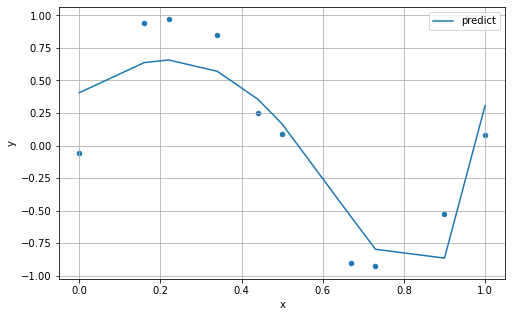

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame({
    "x": X,
    "y": Y,
    "predict": model.predict(X)
})


fig, ax = plt.subplots(figsize=(8, 5))
df.plot.scatter(x="x", y="y", grid=True, ax=ax)
df.plot.line(x="x", y="predict", grid=True, ax=ax)